## Import necessary libary

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import timedelta, datetime

## Read lastest report date

In [2]:
file_name = 'preprocess-data/preprocessed-04-12-2021.csv'
df = pd.read_csv(file_name, delimiter='\t')

## Discover data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   #                  224 non-null    int64  
 1   Country, Other     224 non-null    object 
 2   Total Cases        224 non-null    int64  
 3   New Cases          18 non-null     float64
 4   Total Deaths       212 non-null    float64
 5   New Deaths         15 non-null     float64
 6   Total Recovered    216 non-null    float64
 7   New Recovered      17 non-null     float64
 8   Active Cases       216 non-null    float64
 9   Serious, Critical  157 non-null    float64
 10  Tot Cases/ 1M pop  222 non-null    float64
 11  Deaths/ 1M pop     210 non-null    float64
 12  Total Tests        209 non-null    float64
 13  Tests/ 1M pop      209 non-null    float64
 14  Population         222 non-null    float64
dtypes: float64(12), int64(2), object(1)
memory usage: 26.4+ KB


In [4]:
# Describe statistic information about data
df.describe()

,#,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
count,224.000000,2.240000e+02,18.000000,212.000000,15.000000,2.160000e+02,17.000000,2.160000e+02,157.000000,222.000000,210.000000,2.090000e+02,2.090000e+02,2.220000e+02
mean,112.500000,1.184057e+06,3724.611111,24806.259434,58.733333,1.096566e+06,5037.705882,9.486594e+04,551.496815,60275.779279,953.323810,2.075560e+07,1.336956e+06,3.543492e+07
std,64.807407,4.513959e+06,6106.895872,84914.019221,115.131891,4.020096e+06,9558.742208,6.662136e+05,1646.247741,58381.926065,1011.025506,7.751502e+07,2.294231e+06,1.398795e+08
min,1.000000,1.000000e+00,25.000000,1.000000,1.000000,1.000000e+00,14.000000,0.000000e+00,1.000000,9.000000,2.000000,2.989000e+03,3.279000e+03,8.040000e+02
25%,56.750000,1.357575e+04,105.750000,228.750000,2.500000,1.152100e+04,160.000000,3.207500e+02,7.000000,4783.750000,122.250000,2.491490e+05,1.117090e+05,6.206655e+05
50%,112.500000,9.973700e+04,374.500000,1982.500000,10.000000,9.171850e+04,563.000000,2.882500e+03,43.000000,49727.500000,628.000000,1.763026e+06,5.756290e+05,6.224199e+06
75%,168.250000,5.860010e+05,4786.000000,11724.500000,50.000000,5.633095e+05,5666.000000,2.760650e+04,347.000000,99300.250000,1524.750000,1.047862e+07,1.468811e+06,2.333744e+07
max,224.000000,4.987805e+07,17910.000000,808116.000000,436.000000,3.946324e+07,34900.000000,9.606688e+06,13714.000000,251642.000000,5988.000000,7.596014e+08,1.631762e+07,1.439324e+09


In [5]:
# View first 5 rows about data
df.head()

,#,"Country, Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
0,1,USA,49878049,NaN,808116.0,NaN,39463245.0,NaN,9606688.0,13714.0,149443.0,2421.0,759601375.0,2275890.0,3.337601e+08
1,2,India,34624360,NaN,470530.0,NaN,34053856.0,8190.0,99974.0,8944.0,24745.0,336.0,646026786.0,461688.0,1.399273e+09
2,3,Brazil,22129409,NaN,615454.0,NaN,21357412.0,NaN,156543.0,8318.0,103069.0,2866.0,63776166.0,297040.0,2.147057e+08
3,4,UK,10379647,NaN,145424.0,NaN,9156066.0,NaN,1078157.0,895.0,151766.0,2126.0,366108215.0,5353035.0,6.839264e+07
4,5,Russia,9736037,NaN,278857.0,NaN,8436631.0,NaN,1020549.0,2300.0,66675.0,1910.0,226800000.0,1553176.0,1.460234e+08


In [6]:
# Check if data has duplicated by checking the id
df['#'].duplicated().any()

False

In [7]:
# View type of columns
df.dtypes

#                      int64
Country, Other        object
Total Cases            int64
New Cases            float64
Total Deaths         float64
New Deaths           float64
Total Recovered      float64
New Recovered        float64
Active Cases         float64
Serious, Critical    float64
Tot Cases/ 1M pop    float64
Deaths/ 1M pop       float64
Total Tests          float64
Tests/ 1M pop        float64
Population           float64
dtype: object

In [8]:
# Format data with object for later use
file = open(file_name, 'r')
logs = file.read()
logs = logs.split('\n')
cols = {}
header = False
for log in logs:
    log = log.split('\t')
    if log[0] != '':
        if not header:
            for l in log:
                cols.setdefault(l, [])
            header = True
        else :
            for i in range(len(log)):
                cols[list(cols.keys())[i]] += log[i],

In [9]:
# This cate_col_profiles is a dictionary, in that each section of the application with a type column, 
# key is the namespace, value is list include: ratio% value missing, number of other value other value 
# (value is missing), set contains diffent values.
cate_col_profiles = {}
for key in cols.keys():
    col_values = cols[key]
    missing_values = [x for x in col_values if x == '']
    values = [x for x in col_values if x != '']
    cate_col_profiles[key] = [len(missing_values)/len(col_values) * 100, len(set(values)), set(values)] 

In [10]:
# Print out information about missing and diffent values
print(f"{'ColName':20} {'Miss(%)':7} {'NumDifVals':10} {'SomeVals'}")
for col_name, col_profile in cate_col_profiles.items():
    print(f'{col_name:20} {col_profile[0]:<7.3f} {col_profile[1]:<10} {col_profile[2].__repr__()[:34]+"...":<}')

ColName              Miss(%) NumDifVals SomeVals
#                    0.000   224        {'146', '86', '93', '125', '113', ...
Country, Other       0.000   224        {'Malaysia', 'Malta', 'Faeroe Isla...
Total Cases          0.000   223        {'30770', '5824', '279954', '43366...
New Cases            91.964  18         {'141', '686', '212', '17910', '31...
Total Deaths         5.357   205        {'697', '2322', '3573', '93', '342...
New Deaths           93.304  12         {'70', '20', '8', '47', '2', '10',...
Total Recovered      3.571   213        {'22912', '16046', '405543', '3494...
New Recovered        92.411  17         {'49', '6702', '34900', '2588', '7...
Active Cases         3.571   199        {'448', '9606688', '14977', '2912'...
Serious, Critical    29.911  99         {'342', '692', '90', '609', '51', ...
Tot Cases/ 1M pop    0.893   221        {'215654', '697', '70485', '153289...
Deaths/ 1M pop       6.250   198        {'146', '1526', '770', '2030', '22...
Total Tests    

##  Data Visualization

### Function for getting all data from specfied country

In [11]:
# First read data from our file
# Read Total Cases, New Cases, Total Deaths, New Deaths, Total Recovered, New Recovered of country Viet Nam until now
def get_data(country_id):
    start_date = '22-11-2021'
    end_date = '10-12-2021'
    dt_start = datetime.strptime(start_date, "%d-%m-%Y")
    dt_end = datetime.strptime(end_date, "%d-%m-%Y")
    data_date, total_cases, new_cases, total_deaths, new_deaths, total_recovered, new_recovered = [], [], [], [], [], [], []
    while dt_start < dt_end:
        dt_str = dt_start.strftime('%d-%m-%Y')
        data_date.append(dt_str[:-5])
        df = pd.read_csv(f'preprocess-data/preprocessed-{dt_str}.csv', delimiter='\t')
        df = df.fillna(0)
        country_data = df[df['Country, Other']==country_id].values
        total_cases.append(country_data[0][2])
        new_cases.append(country_data[0][3])
        total_deaths.append(country_data[0][4])
        new_deaths.append(country_data[0][5])
        total_recovered.append(country_data[0][6])
        new_recovered.append(country_data[0][7])
        dt_start += timedelta(days=1)
    return data_date, total_cases, total_deaths, total_recovered, new_cases, new_deaths, new_recovered

def get_data_all_countries():
    start_date = '22-11-2021'
    end_date = '10-12-2021'
    dt_start = datetime.strptime(start_date, "%d-%m-%Y")
    dt_end = datetime.strptime(end_date, "%d-%m-%Y")
    data_date, new_cases, new_deaths, new_recovered = [], [], [], []
    while dt_start < dt_end:
        dt_str = dt_start.strftime('%d-%m-%Y')
        data_date.append(dt_str[:-5])
        df = pd.read_csv(f'preprocess-data/preprocessed-{dt_str}.csv', delimiter='\t')
        df = df.fillna(0)
        new_cases.append(df["New Cases"].values)
        new_deaths.append(df["New Deaths"].values)
        new_recovered.append(df["New Recovered"].values)
        dt_start += timedelta(days=1)
    return data_date, new_cases, new_deaths, new_recovered

### Line Chart

In [12]:
# Get data from Viet Nam
data_date, total_cases, total_deaths, total_recovered, new_cases, new_deaths, new_recovered = get_data('Vietnam')

- We plot data with three columns: "Total Cases", "Total Deaths", "Total Recovered"
- Data is collected from Viet Nam country from 22-11-2021 until 12-12-2021

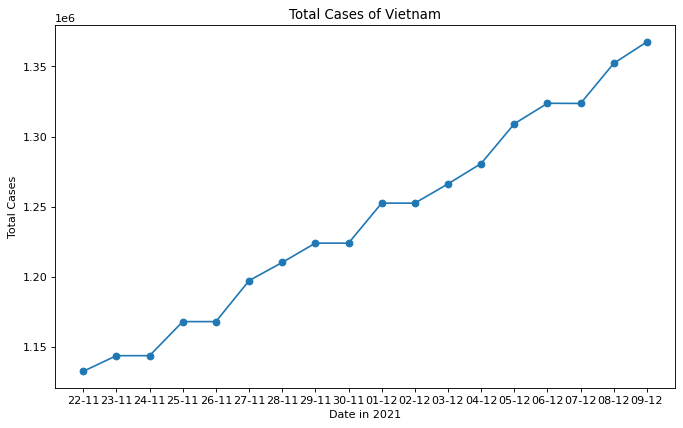

In [13]:
figure(figsize=(10, 6), dpi=80)
plt.plot(data_date, total_cases, linestyle='-', marker='o')
plt.title('Total Cases of Vietnam')
plt.xlabel('Date in 2021')
plt.ylabel('Total Cases')
plt.show()

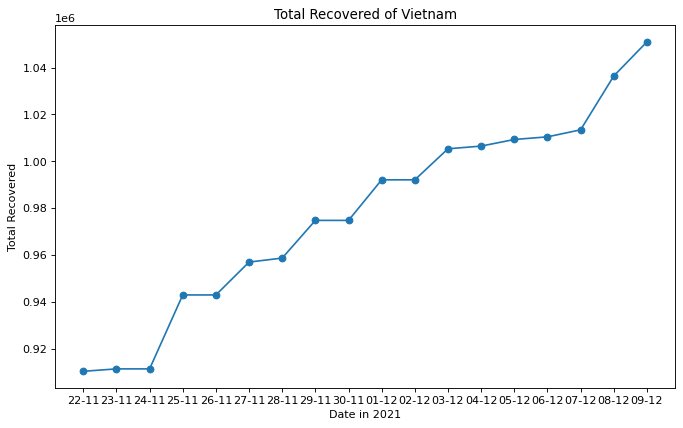

In [14]:
figure(figsize=(10, 6), dpi=80)
plt.plot(data_date, total_recovered, linestyle='-', marker='o')
plt.title('Total Recovered of Vietnam')
plt.xlabel('Date in 2021')
plt.ylabel('Total Recovered')
plt.show()

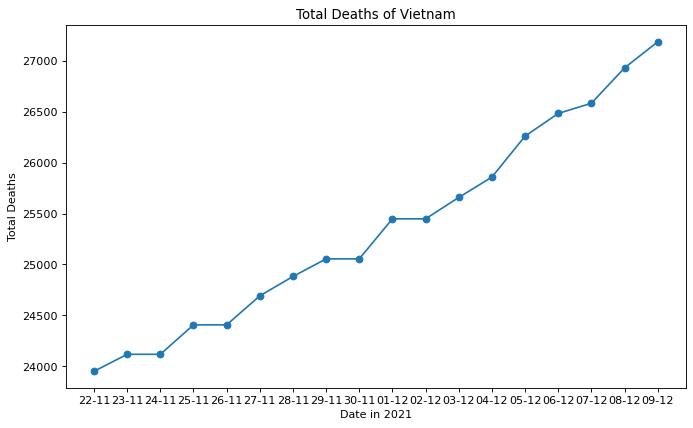

In [15]:
figure(figsize=(10, 6), dpi=80)
plt.plot(data_date, total_deaths, linestyle='-', marker='o')
plt.title('Total Deaths of Vietnam')
plt.xlabel('Date in 2021')
plt.ylabel('Total Deaths')
plt.show()

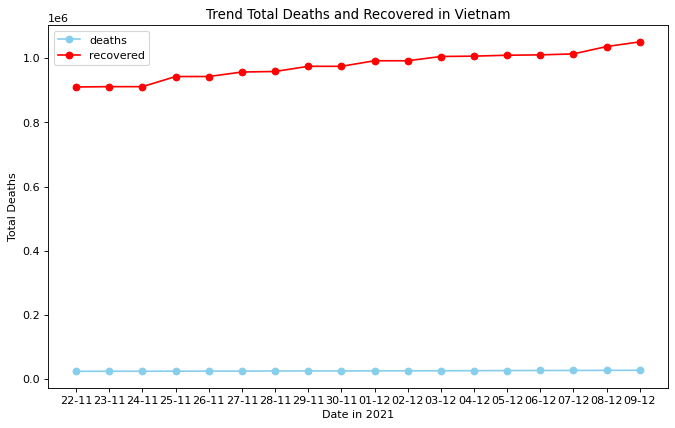

In [16]:
figure(figsize=(10, 6), dpi=80)
plt.plot(data_date, total_deaths, linestyle='-', marker='o', color='skyblue', label='deaths')
plt.plot(data_date, total_recovered, linestyle='-', marker='o', color='red', label='recovered')
plt.title('Trend Total Deaths and Recovered in Vietnam')
plt.xlabel('Date in 2021')
plt.ylabel('Total Deaths')
plt.legend()
plt.show()

### Bar Chart

- Data is collected on 04-12-2021
- We visualize Top 20 Country leading the number of cases in the world

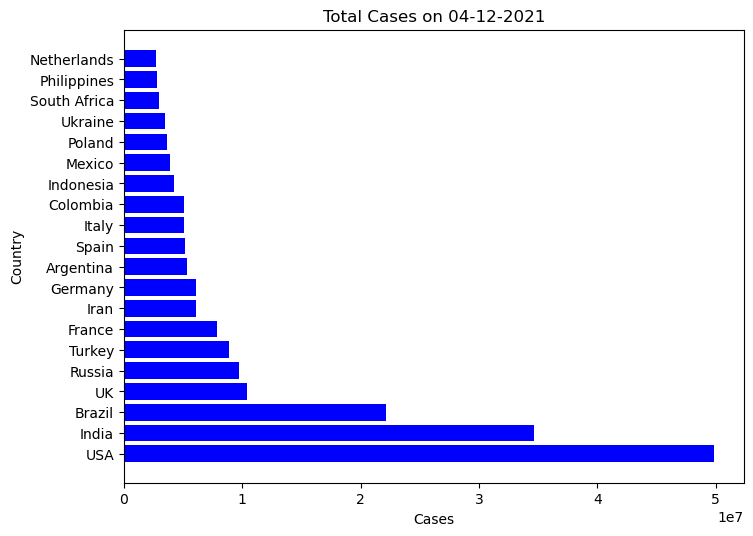

In [17]:
figure(figsize=(8, 6), dpi=100)
plt.barh(df['Country, Other'][:20], df['Total Cases'][:20], color ='blue')
plt.xlabel("Cases")
plt.ylabel("Country")
plt.title("Total Cases on 04-12-2021")
plt.show()

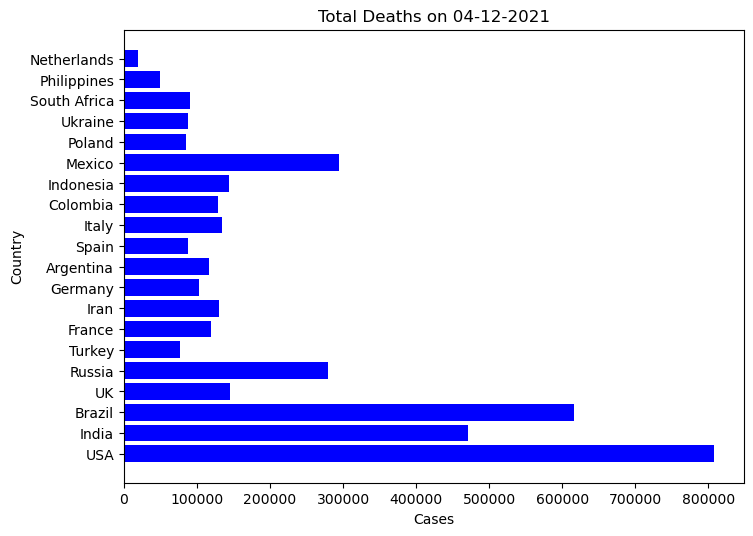

In [18]:
figure(figsize=(8, 6), dpi=100)
plt.barh(df['Country, Other'][:20], df['Total Deaths'][:20], color ='blue')
plt.xlabel("Cases")
plt.ylabel("Country")
plt.title("Total Deaths on 04-12-2021")
plt.show()

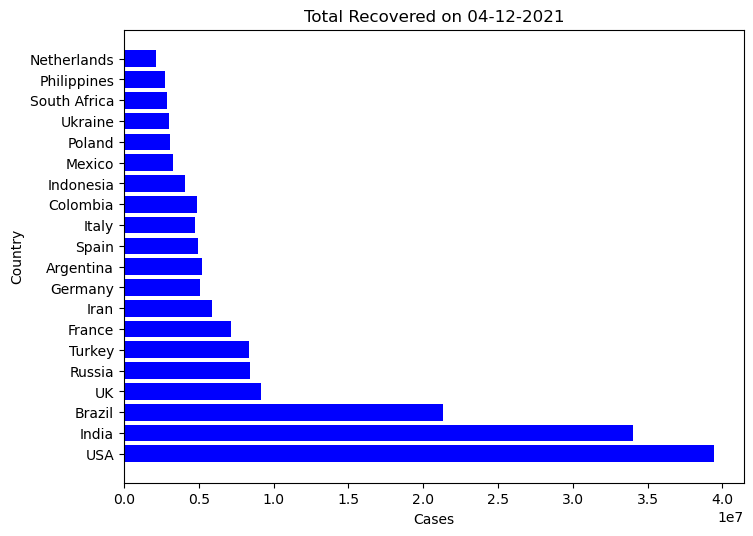

In [19]:
figure(figsize=(8, 6), dpi=100)
plt.barh(df['Country, Other'][:20], df['Total Recovered'][:20], color ='blue')
plt.xlabel("Cases")
plt.ylabel("Country")
plt.title("Total Recovered on 04-12-2021")
plt.show()

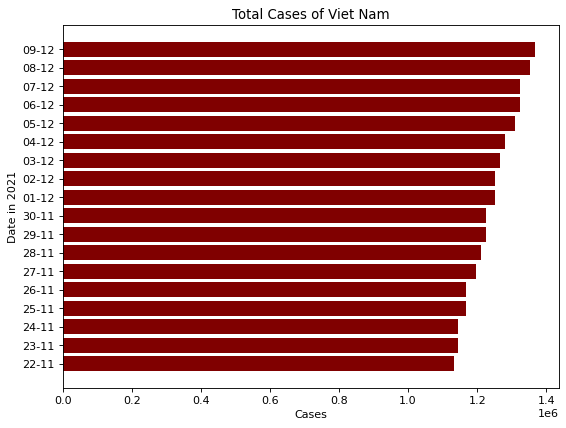

In [20]:
figure(figsize=(8, 6), dpi=80)
plt.barh(data_date, total_cases, color ='maroon')
plt.xlabel("Cases")
plt.ylabel("Date in 2021")
plt.title("Total Cases of Viet Nam")
plt.show()

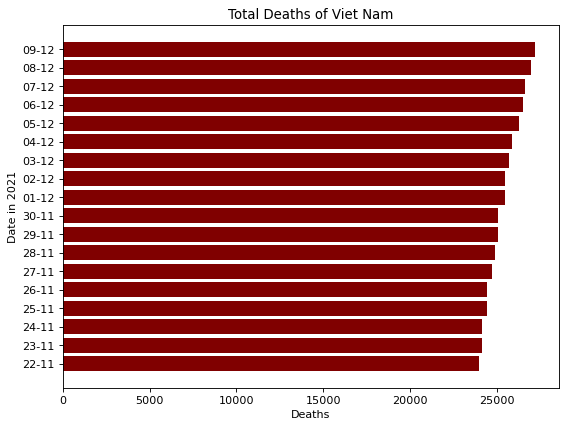

In [21]:
figure(figsize=(8, 6), dpi=80)
plt.barh(data_date, total_deaths, color ='maroon')
plt.xlabel("Deaths")
plt.ylabel("Date in 2021")
plt.title("Total Deaths of Viet Nam")
plt.show()

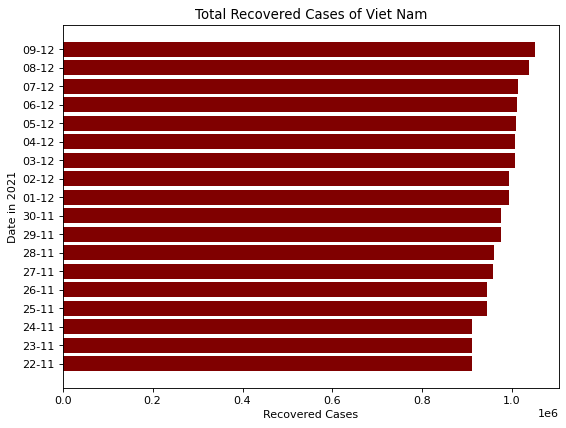

In [22]:
figure(figsize=(8, 6), dpi=80)
plt.barh(data_date, total_recovered, color ='maroon')
plt.xlabel("Recovered Cases")
plt.ylabel("Date in 2021")
plt.title("Total Recovered Cases of Viet Nam")
plt.show()

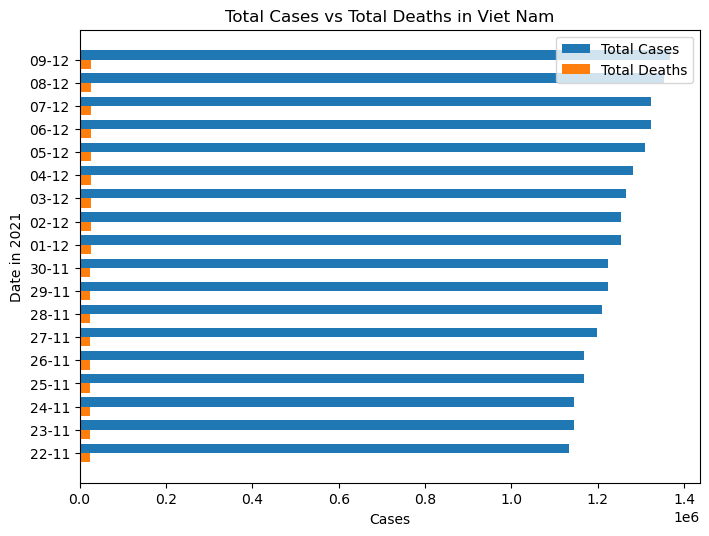

In [23]:
X_axis = np.arange(len(data_date))

figure(figsize=(8, 6), dpi=100)
plt.barh(X_axis+0.2, total_cases, 0.4, label = 'Total Cases')
plt.barh(X_axis-0.2, total_deaths, 0.4, label = 'Total Deaths')
plt.yticks(X_axis, data_date)
plt.xlabel("Cases")
plt.ylabel("Date in 2021")
plt.title("Total Cases vs Total Deaths in Viet Nam")
plt.legend()
plt.show()

### Stacked Bar Chart

- Show part of "Total Deaths" and "Total Recovered"
- Data is collected from Russia country from 22-11-2021 until 12-12-2021

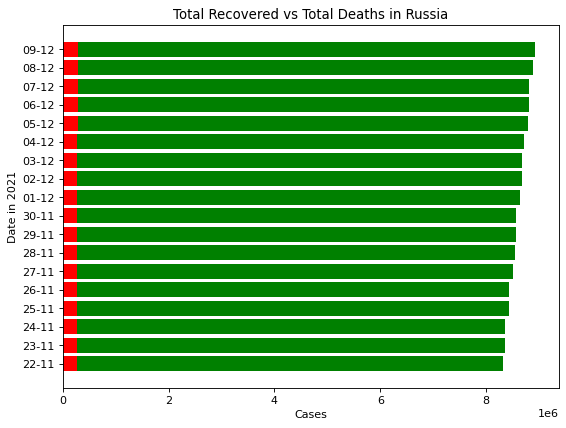

In [24]:
data_date, total_cases, total_deaths, total_recovered, new_cases, new_deaths, new_recovered = get_data('Russia')

figure(figsize=(8, 6), dpi=80)

plt.barh(data_date, total_deaths, color='r')
plt.barh(data_date, total_recovered, left=total_deaths, color='g')
plt.xlabel("Cases")
plt.ylabel("Date in 2021")
plt.title("Total Recovered vs Total Deaths in Russia")
plt.show()

### Histogram

- We plot data of date 04-12-2021 with three columns: "Total Cases", "Total Deaths", "Total Recovered"

Text(0.5, 0, 'Total Cases')

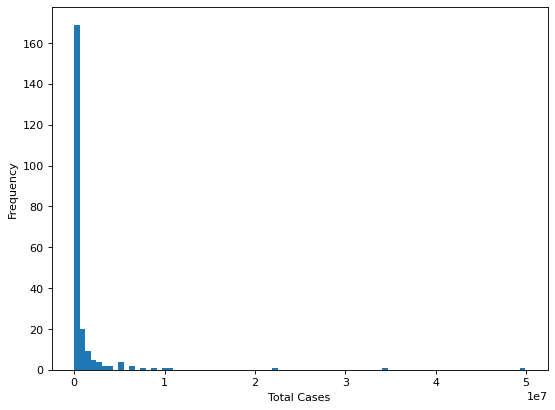

In [25]:
figure(figsize=(8, 6), dpi=80)
plt.hist(df['Total Cases'].values, density=False, bins=82)
plt.ylabel('Frequency')
plt.xlabel('Total Cases')

Text(0.5, 0, 'Total Deaths')

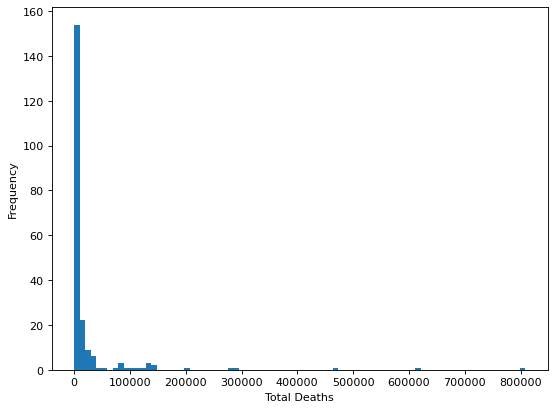

In [26]:
figure(figsize=(8, 6), dpi=80)
plt.hist(df['Total Deaths'].values, density=False, bins=82)
plt.ylabel('Frequency')
plt.xlabel('Total Deaths')

Text(0.5, 0, 'Total Recovered')

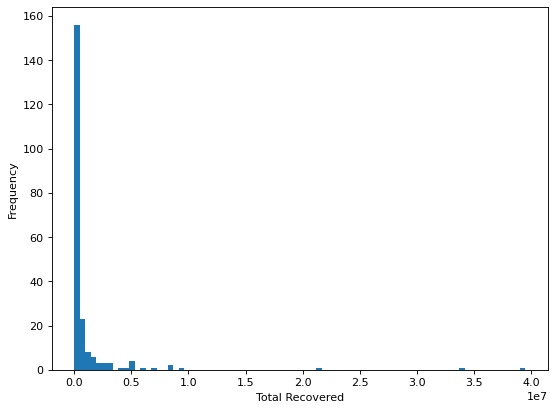

In [27]:
figure(figsize=(8, 6), dpi=80)
plt.hist(df['Total Recovered'].values, density=False, bins=82)
plt.ylabel('Frequency')
plt.xlabel('Total Recovered')

### Boxplot

- We plot data with three columns: "Total Cases", "Total Deaths", "Total Recovered"
- Data is collected from Russia country from 22-11-2021 until 12-12-2021

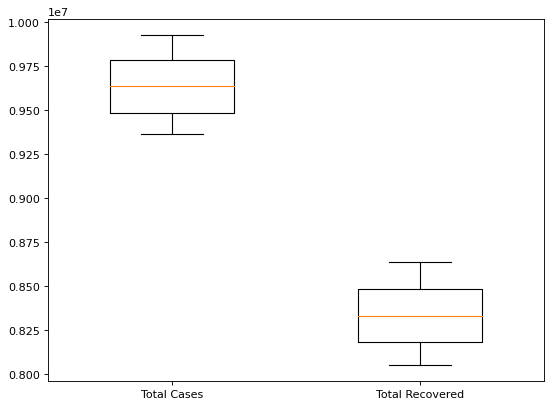

In [28]:
figure(figsize=(8, 6), dpi=80)
plt.boxplot([total_cases, total_recovered], widths=(0.5, 0.5), labels=['Total Cases', 'Total Recovered'])
plt.show()

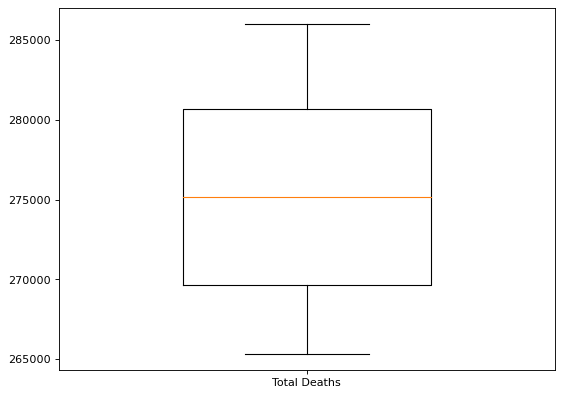

In [29]:
figure(figsize=(8, 6), dpi=80)
plt.boxplot([total_deaths], widths=(0.5,), labels=['Total Deaths'])
plt.show()

### Scatter Plot

- We use scatter plot for finding relationship between two attribute of data
- We use data of Russia country from 22-11-2021 until 12-12-2021

In [30]:
# Get data of all countries in the world
data_date, new_cases, new_deaths, new_recovered = get_data_all_countries()

<AxesSubplot:>

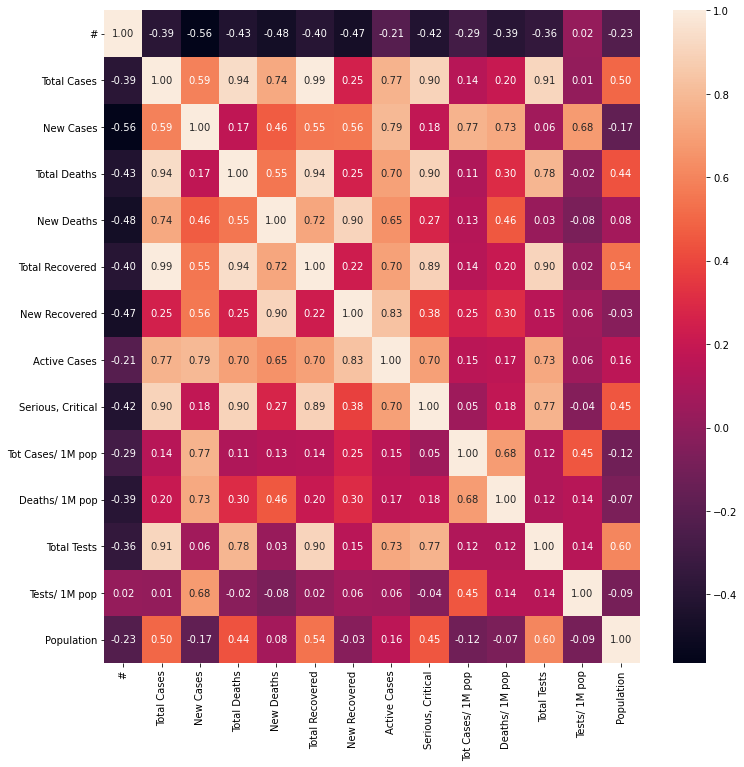

In [31]:
fig = plt.figure(figsize=(12,12))
corr = df.select_dtypes(include = ['float64', 'int64']).corr()
sns.heatmap(corr, annot = True, fmt = '.2f')

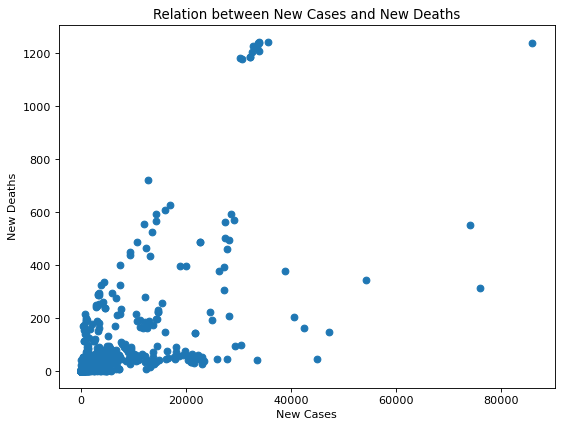

In [32]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(new_cases, new_deaths, cmap='viridis')
plt.xlabel('New Cases')
plt.ylabel('New Deaths')
plt.title('Relation between New Cases and New Deaths')
plt.show()

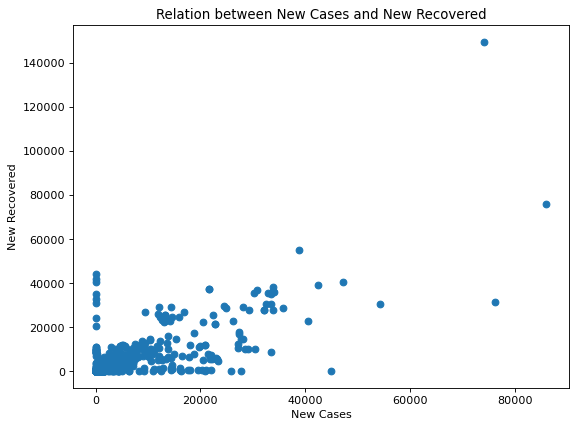

In [33]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(new_cases, new_recovered, cmap='viridis')
plt.xlabel('New Cases')
plt.ylabel('New Recovered')
plt.title('Relation between New Cases and New Recovered')
plt.show()

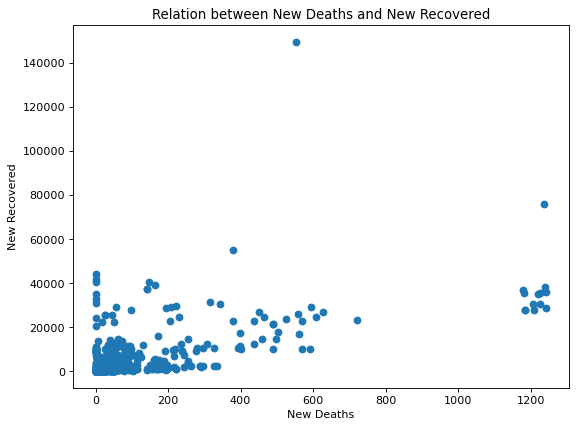

In [34]:
figure(figsize=(8, 6), dpi=80)
plt.scatter(new_deaths, new_recovered, cmap='viridis')
plt.xlabel('New Deaths')
plt.ylabel('New Recovered')
plt.title('Relation between New Deaths and New Recovered')
plt.show()